# Goal: Implement the Perceptron Algorithm and Investigate the Initialization of the Perceptron Algorithm using the Null Vector.

*An algorithm for the perceptron was used from the following website: https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537




This algoritm was adjusted so the variable names were symnonmous to the variable names used in lectures. As perceptrons deal with binary data, a dataset was created which contained 2 features. These datasets are in R**2. Graphcally these are represented as blue squares and red circles. 4 different datasets were created with different parameters.

Dataset 1 contains 100 samples and the standard deviation of the clustors is 1.
Dataset 2 contains 500 samples and the standard deviation of the clustors is 1. This is to investigate the impact that the increase of the sample size has on the output.
Dataset 3 contains 500 samples and the standard deviation of the clustors is 1.2. This is to investigate the impact that the increase of the standard deviation has on the output.
Dataset 4 contains 500 samples and the standard deviation is increaed so that the dataset is no longer linerarly seperable. This is to graphically show that the perceptron cannot deal with non-linearly seperable data.

The 4 datasets are plotted below.

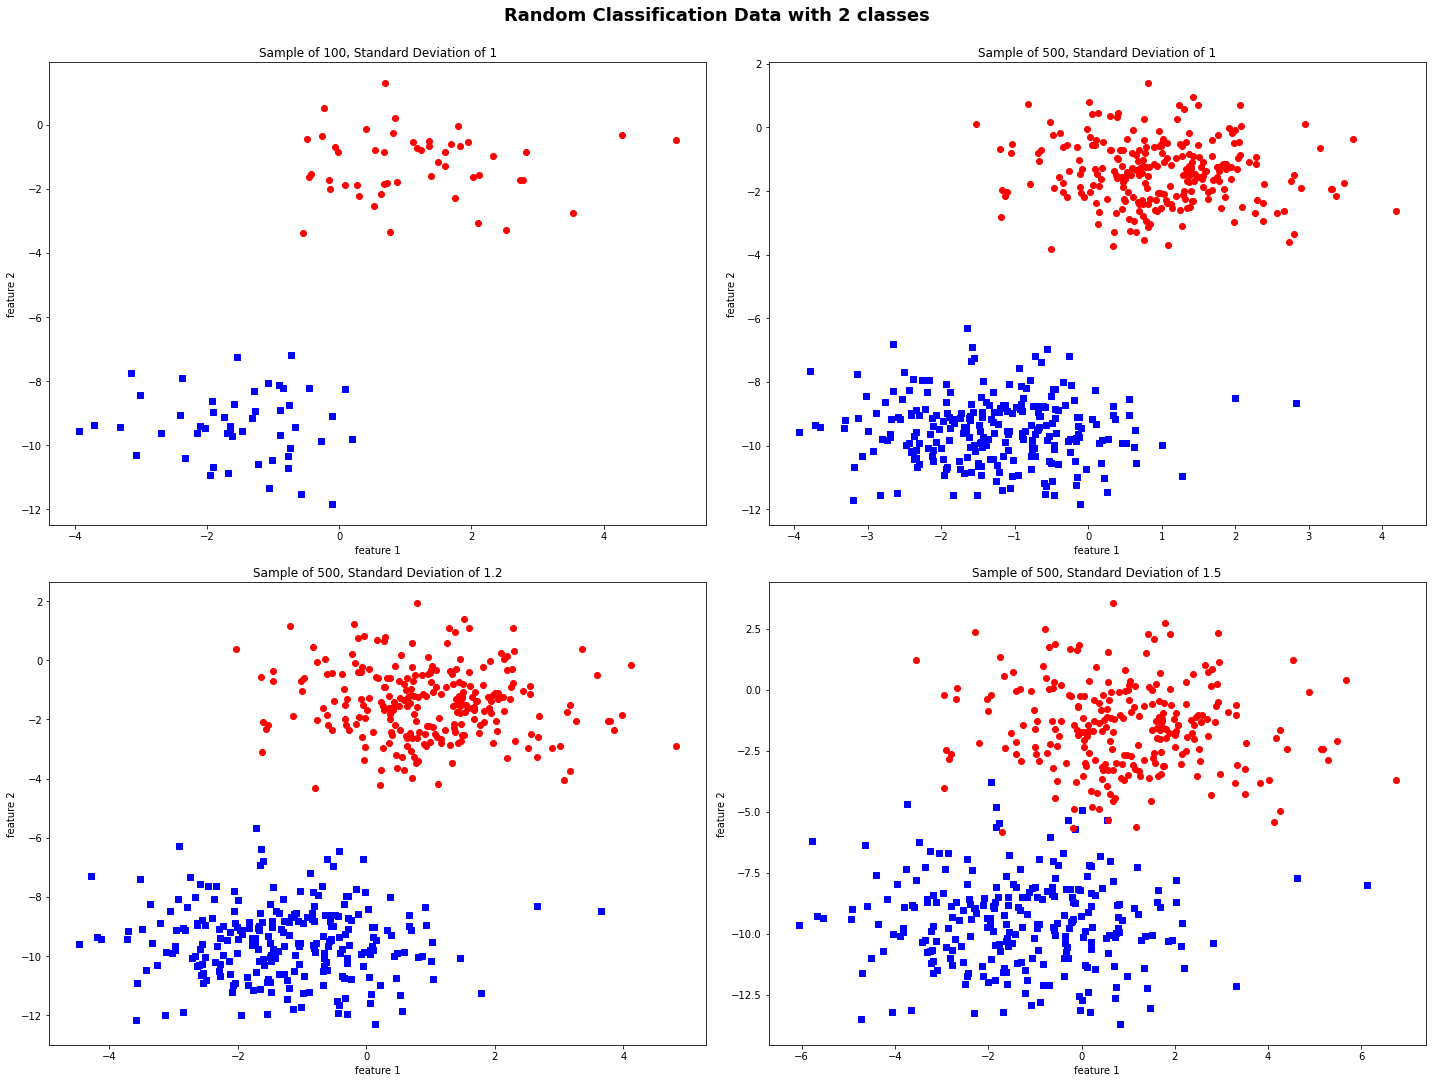

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

x_1, y_1 = datasets.make_blobs(n_samples=100,n_features=2,
                           centers=2,cluster_std=1.0,
                           random_state=2)

x_2, y_2 = datasets.make_blobs(n_samples=500,n_features=2,
                           centers=2,cluster_std=1.0,
                           random_state=2)

x_3, y_3 = datasets.make_blobs(n_samples=500,n_features=2,
                           centers=2,cluster_std=1.2,
                           random_state=2)

x_4, y_4 = datasets.make_blobs(n_samples=500,n_features=2,
                           centers=2,cluster_std=1.8,
                           random_state=2)


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
axs[0, 0].plot(x_1[:, 0][y_1 == 0], x_1[:, 1][y_1 == 0], 'bs')
axs[0, 0].plot(x_1[:, 0][y_1 == 1], x_1[:, 1][y_1 == 1], 'ro')
axs[0, 0].set_title('Sample of 100, Standard Deviation of 1')

axs[0, 1].plot(x_2[:, 0][y_2 == 0], x_2[:, 1][y_2 == 0], 'bs')
axs[0, 1].plot(x_2[:, 0][y_2 == 1], x_2[:, 1][y_2 == 1], 'ro')
axs[0, 1].set_title('Sample of 500, Standard Deviation of 1')

axs[1, 0].plot(x_3[:, 0][y_3 == 0], x_3[:, 1][y_3 == 0], 'bs')
axs[1, 0].plot(x_3[:, 0][y_3 == 1], x_3[:, 1][y_3 == 1], 'ro')
axs[1, 0].set_title('Sample of 500, Standard Deviation of 1.2')

axs[1, 1].plot(x_4[:, 0][y_4 == 0], x_4[:, 1][y_4 == 0], 'bs')
axs[1, 1].plot(x_4[:, 0][y_4 == 1], x_4[:, 1][y_4 == 1], 'ro')
axs[1, 1].set_title('Sample of 500, Standard Deviation of 1.5')

plt.suptitle('Random Classification Data with 2 classes', weight='bold', y=1.0, fontsize=18)


for ax in axs.flat:
    ax.set(xlabel='feature 1', ylabel='feature 2')


plt.tight_layout()


The perceptron I am looking at is a Perceptron with a hard threshold which means to say that the function is a step function which returns a value of 0 or 1.

In [2]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

The perceptron alogrithm has 4 imput parameters. The first is the number of training examples and the second is the number of features (which should always be 2). The Perceptron algorithm is initialized with the null vector. This will be updated later to a non-null vector to look at the effects on the learning coefficient(n). The learning coefficent is the third argument and the forth is the number of iterations. After each iteration, the number of misclassified data features are stored in a list. 

In [3]:
def perceptron(x, y, lr, num_iterations):
    
    m, n = x.shape
    
    # Initializing parapeters(w) to zeros.
    # +1 in n+1 for the bias term.
    
    w = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for num in range(num_iterations):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(x):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, w))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return w, n_miss_list

A defiition is created to plot the decision boundary that the perceptron algorithm has output.

In [4]:
def plot_decision_boundary(x,y,w):
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(x[:,0]), max(x[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'bs')
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'ro')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')

In [5]:
w_1, miss_l_1 = perceptron(x_1, y_1, 0.5, 10)
w_2, miss_l_2 = perceptron(x_2, y_2, 0.5, 10)
w_3, miss_l_3 = perceptron(x_3, y_3, 0.5, 10)

print('The number of mislabeled classes for the first interation of sample = 100 is', miss_l_1[0])
print('')
print('The number of mislabeled classes for the first interation of sample = 500 is', miss_l_2[0])
print('')
print(f'The number of mislabeled classes for the first interation of sample = 500 \n but with an  increased standard deviation is', miss_l_3[0])

The number of mislabeled classes for the first interation of sample = 100 is 11

The number of mislabeled classes for the first interation of sample = 500 is 24

The number of mislabeled classes for the first interation of sample = 500 
 but with an  increased standard deviation is 32


The above indicates that a larger the dataset and a larger varience causes the percetron algorithm in this case to misidentify more points on the first iteration. For all cases, these do converge using further iterations to a boundry which classifys all points correctly. One of the cases is below with the second dataset, initially 24 points are misclassified but by the 6th iteration, 0 points are misclassified. This shows nicely the convergence of the perceptron algorithm on linearly classified data. Graphically this can be seen as the yellow line splits the datset in two with the red dots above the line and the blue squares below the line.

[24, 13, 10, 4, 3, 0, 0, 0, 0, 0]


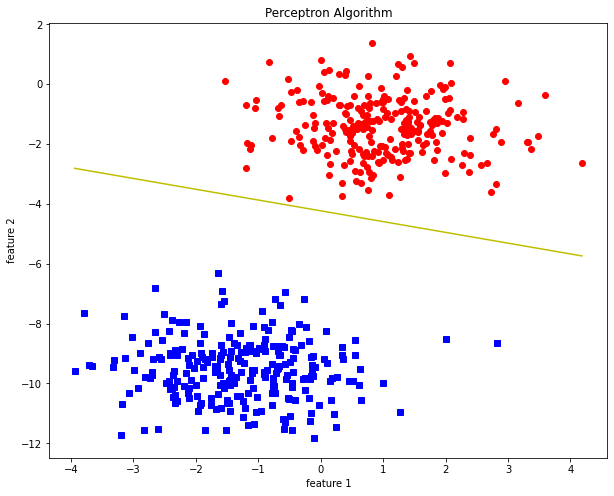

In [6]:
plot_decision_boundary(x_2, y_2, w_2)
print(miss_l_2)

Below it can be shown how the perceptron algroritm fails on non linearly seperable data. It can be clearly seen visually that no line can seperate this data. The perceptron algoritm is run for 50 iterations and it can be seen that the number of misclassified points is remaining largely the same and will not converge down to 0.

[50, 30, 24, 18, 17, 14, 15, 15, 14, 14, 12, 14, 12, 13, 13, 10, 13, 15, 10, 13, 8, 13, 13, 8, 9, 10, 9, 10, 14, 10, 8, 13, 10, 10, 8, 8, 14, 8, 8, 11, 8, 8, 11, 8, 8, 11, 13, 10, 10, 8]


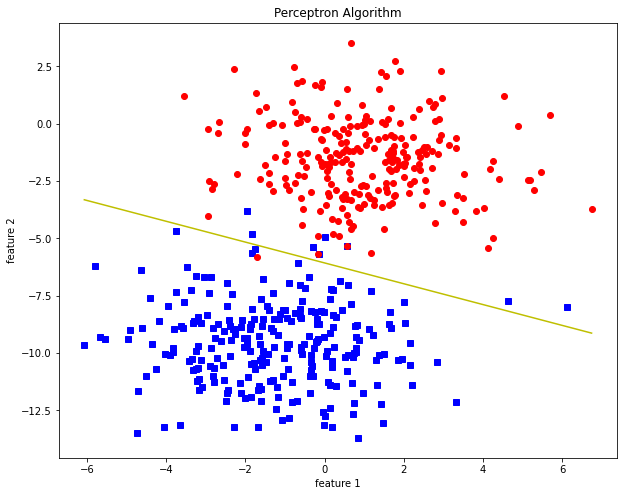

In [7]:
w_4, miss_l_4 = perceptron(x_4, y_4, 0.5, 50)
plot_decision_boundary(x_4, y_4, w_4)
print(miss_l_4)

A second definition of the perceptron algoritm is created but initialising the weights with values of 1 rather than a null vector as previously used above. The datasets used are the same as above. It can be seen that the learning rate causes the number of misclassified points to converge to 0 at a slower rate.

In [8]:
def perceptron_2(x, y, lr, num_iterations):
    
    m, n = x.shape
    
    # Initializing parapeters(w) to zeros.
    # +1 in n+1 for the bias term.
    
    w = np.ones((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for num in range(num_iterations):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(x):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, w))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return w, n_miss_list

In the cases below, the learning rate and the inizialisation of the original weighted vector are the only parameters that are changing.

In the first example, the null vector is used w = (0, 0, 0). The learning rate is a value between 0 and 1. Thus a small learning rate of 0.001 is compared against the largest learning rate possible of 1. The problem with using a large learning rate is the perceptron algorithm could converge too quickly to a suboptimal solution. In contract, using a small learning rate can cause the algorithm to converge too slowly causing the process to get stuck. The purpose of this comparision is to show the impact that the null vector has on the learning rate so neither of the above issues about the size of the learning rate are considered.

It can be seen that using the null vector the increase or decrease of the elarning rate does not have an impact on how fast the misclassification of points converge to zero. They both converge to 0 misclassifications after 6 iterations.

In [9]:
w_2_sml_lp_zeros, miss_l_2_sml_lp_zeros = perceptron(x_2, y_2, 0.001, 50)
w_2_lrge_lp_zeros, miss_2_lrge_lp_zeros = perceptron(x_2, y_2, 1, 50)
print("With a null initialisation vector and a learning rate of 0.001: ", miss_l_2_sml_lp_zeros)
print("With a null initialisation vector and a learning rate of 1: ", miss_2_lrge_lp_zeros)

With a null initialisation vector and a learning rate of 0.001:  [24, 13, 10, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
With a null initialisation vector and a learning rate of 1:  [24, 13, 10, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In the second example, when the initialation vector is non-null, w = (1,1,1), the learning rate has a significant effect on the convergence. When the learning rate is small, even after 50 iterations the algorithm is still misclassifing points although they are clearly converging to 0 over time. This is a large contrast to the learning algoritm of 1 which causes the algorithm to converge after 2 iterations.

In [10]:
w_2_sml_lp, miss_l_2_sml_lp = perceptron_2(x_2, y_2, 0.001, 50)
w_2_lrge_lp, miss_2_lrge_lp = perceptron_2(x_2, y_2, 1, 50)
print("With a non-null initialisation vector and a learning rate of 0.001: ", miss_l_2_sml_lp)
print("With a non-null initialisation vector and a learning rate of 0.001: ", miss_2_lrge_lp)

With a non-null initialisation vector and a learning rate of 0.001:  [73, 53, 39, 30, 23, 17, 15, 13, 12, 10, 10, 9, 9, 9, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3]
With a non-null initialisation vector and a learning rate of 0.001:  [26, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


A graphical representation of the non null initialisation vectors discussed above.

The first graph shows the small learning rate while the second graph shows the output with the large learning rate.

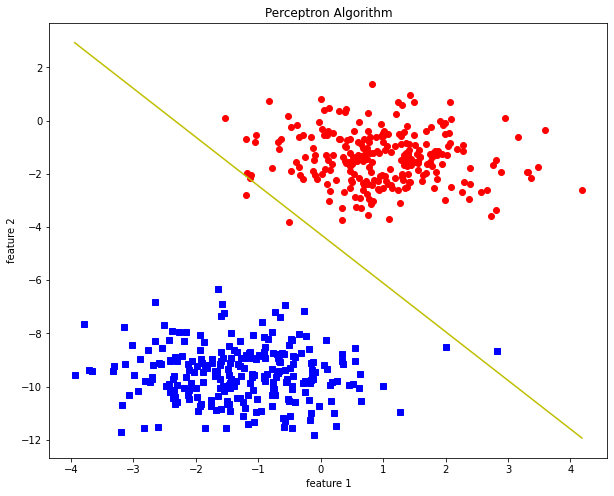

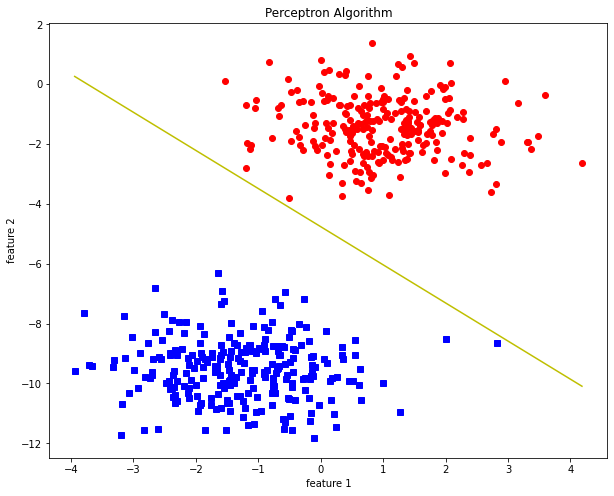

In [11]:
plot_decision_boundary(x_2, y_2, w_2_sml_lp)

plot_decision_boundary(x_2, y_2, w_2_lrge_lp)

In conclusion, the perceptron algotion was implemented on 4 different datasets. It was shown that the perceptron algorithm works with binary and linearly sperable data. It was also shown that the perceptron algorithm terminates in a finite number of sets if the data is linearly seperable. It can be seen that if the perceptron algorithm uses the null vector to initialise the weights, then the learning coeffiecient 'neta' does not affect the learning rate.